In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt


(-0.5, 639.5, 479.5, -0.5)

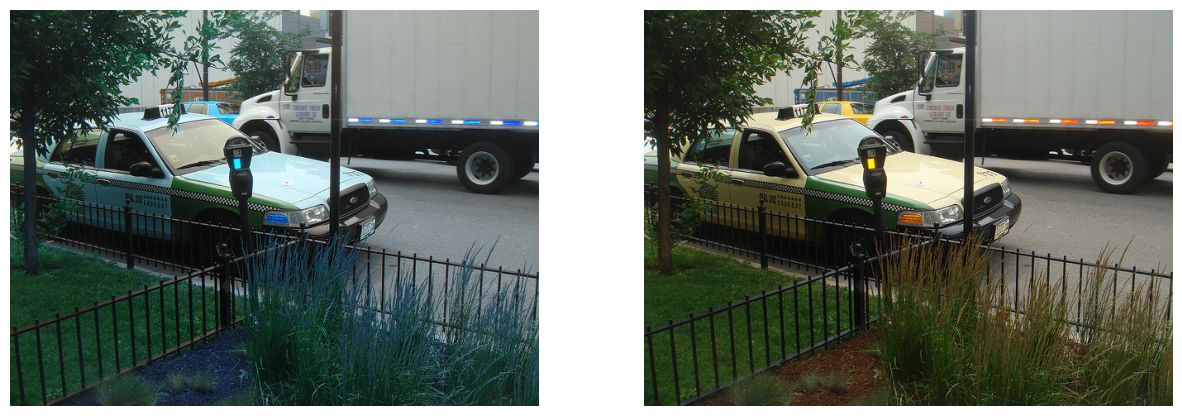

In [2]:
img = cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg')
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

img_bgr= cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg')


img_rgb= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.axis('off')



In [3]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg: 480x640 1 car, 1 train, 1 truck, 1 parking meter, 253.5ms
Speed: 12.7ms preprocess, 253.5ms inference, 21.4ms postprocess per image at shape (1, 3, 480, 640)


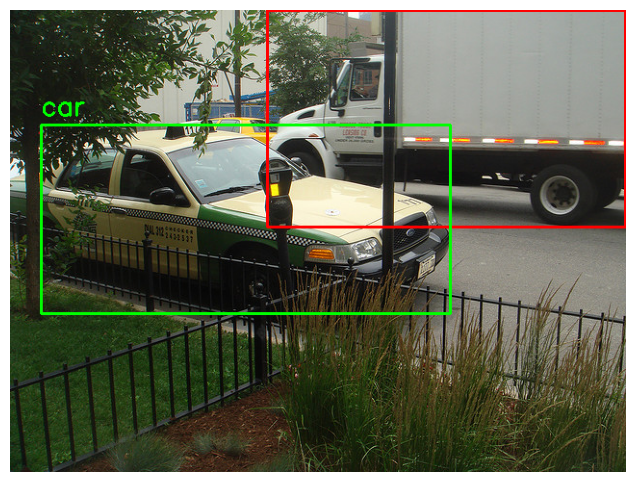

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# loading the model
model = YOLO("yolov8n.pt")

# loading image 
image = cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


results = model('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg')  # results is a list of Results objects

# filter for car and truck + draw rectangle
for r in results:  # r is a Results object
    for obj in r.boxes:
        cls = int(obj.cls[0])
        label = r.names[cls] 
        if label in ["car", "truck"]:
            x1, y1, x2, y2 = map(int, obj.xyxy[0])
            color = (0, 255, 0) if label=="car" else (255, 0, 0)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image_rgb, label, (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


plt.figure(figsize=(10,6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()



image 1/1 /kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg: 480x640 1 car, 2 trucks, 1 parking meter, 210.4ms
Speed: 1.5ms preprocess, 210.4ms inference, 18.4ms postprocess per image at shape (1, 3, 480, 640)


(-0.5, 639.5, 479.5, -0.5)

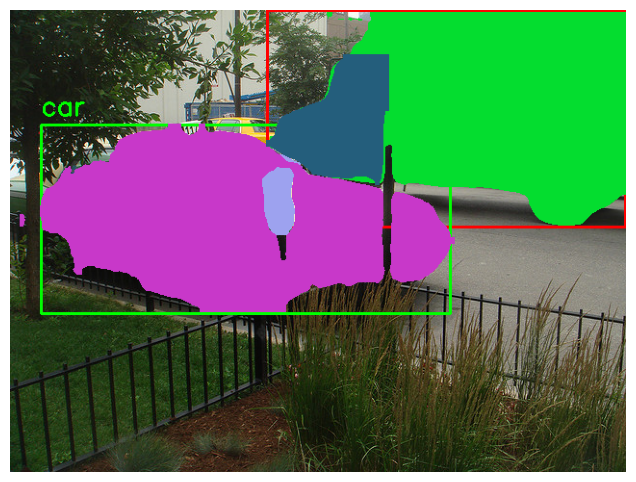

In [5]:
model= YOLO('yolov8n-seg.pt')
results=model('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg')

for r in results:
    if r.masks is not None: 
        for obj in r.masks:
            mask=obj.data[0].cpu().numpy()
            mask_resized= cv2.resize(mask, (image_rgb.shape[1], image_rgb.shape[0]))
            mask_resized= mask_resized>0.5
            color= np.random.randint(0, 255, size=(3,), dtype=int)
            image_rgb[mask_resized]=color 

plt.figure(figsize=(10,6))
plt.imshow(image_rgb)
plt.axis('off')

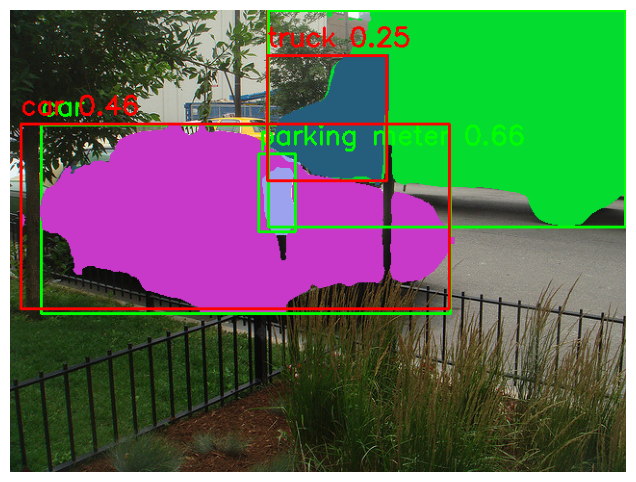

In [6]:
#  for all detected objects
for r in results:  
    for obj in r.boxes:
        cls = int(obj.cls[0])
        label = r.names[cls]       # get class name
        conf = float(obj.conf[0])  # get confidence
        x1, y1, x2, y2 = map(int, obj.xyxy[0])
        
        # Optional: color based on class (just for fun)
        color = (0, 255, 0) if conf > 0.5 else (255, 0, 0)
        
        # Draw rectangle
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)
        # Draw label + confidence
        cv2.putText(image_rgb, f"{label} {conf:.2f}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


plt.figure(figsize=(10,6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

(-0.5, 479.5, 639.5, -0.5)

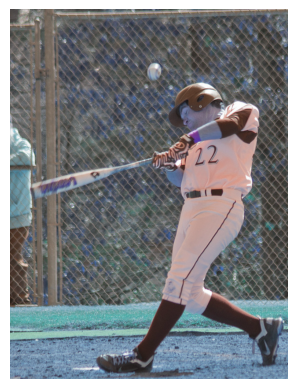

In [7]:
img2=cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000016.jpg')
plt.imshow(img2)
plt.axis('off')

In [8]:
from ultralytics import YOLO
import cv2
import numpy as np 
import matplotlib.pyplot as plt 



image 1/1 /kaggle/input/coco-2017-dataset/coco2017/test2017/000000000016.jpg: 640x480 2 persons, 1 sports ball, 1 baseball bat, 147.2ms
Speed: 1.7ms preprocess, 147.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


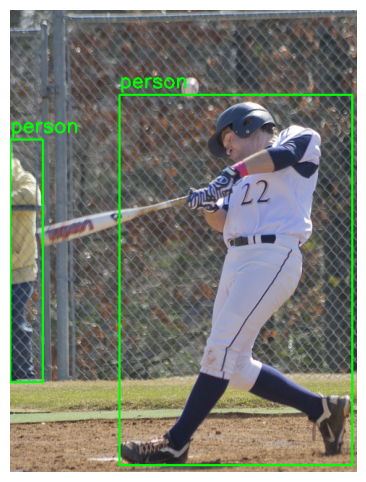

In [9]:
# loading model
model=YOLO('yolov8n.pt')

#loading images 
img2=cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000016.jpg')
img2_rgb= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


results=model('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000016.jpg')


for r in results: 
    for obj in r.boxes:
        cls = int(obj.cls[0])
        label= r.names[cls]
        if label in ['person']:
            x1,y1,x2,y2= map(int, obj.xyxy[0])
            color =(0,255,0) if label =="person" else (255,0,0)
            cv2.rectangle(img2_rgb, (x1,y1), (x2,y2), color, 2)
            cv2.putText(img2_rgb, label, (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color,2)

plt.figure(figsize=(10,6))
plt.imshow(img2_rgb)
plt.axis("off")
plt.show()


image 1/1 /kaggle/input/coco-2017-dataset/coco2017/test2017/000000000016.jpg: 640x480 2 persons, 1 sports ball, 1 baseball bat, 197.1ms
Speed: 1.7ms preprocess, 197.1ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 480)


(-0.5, 479.5, 639.5, -0.5)

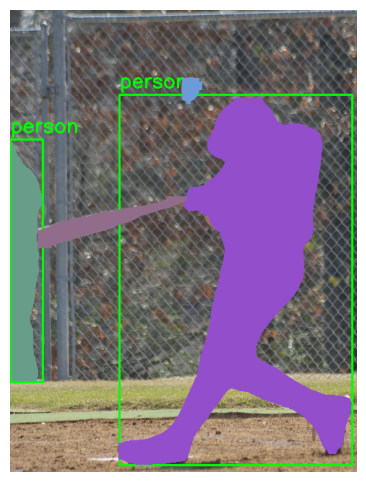

In [10]:
model = YOLO('yolov8n-seg.pt')

results=model('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000016.jpg')

for r in results: 
    if r.masks is not None: 
       for obj in r.masks:
          mask=obj.data[0].cpu().numpy()
          mask_resized=cv2.resize(mask, (img2_rgb.shape[1], img2_rgb.shape[0]))
          mask_resized=mask_resized >0.5
          color= np.random.randint(0,255,size=(3,), dtype=int)
          img2_rgb[mask_resized]= color 

plt.figure(figsize=(10,6))
plt.imshow(img2_rgb)
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

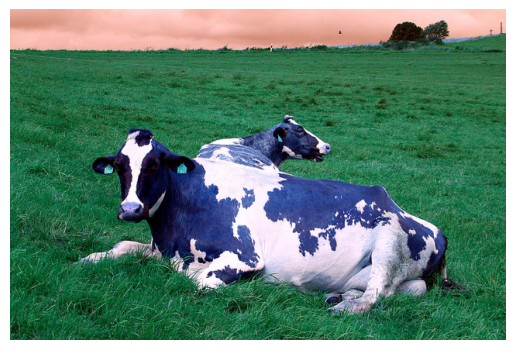

In [11]:
img3= cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000019.jpg')
plt.imshow(img3)
plt.axis('off')


image 1/1 /kaggle/input/coco-2017-dataset/coco2017/test2017/000000000019.jpg: 448x640 2 cows, 143.6ms
Speed: 1.5ms preprocess, 143.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


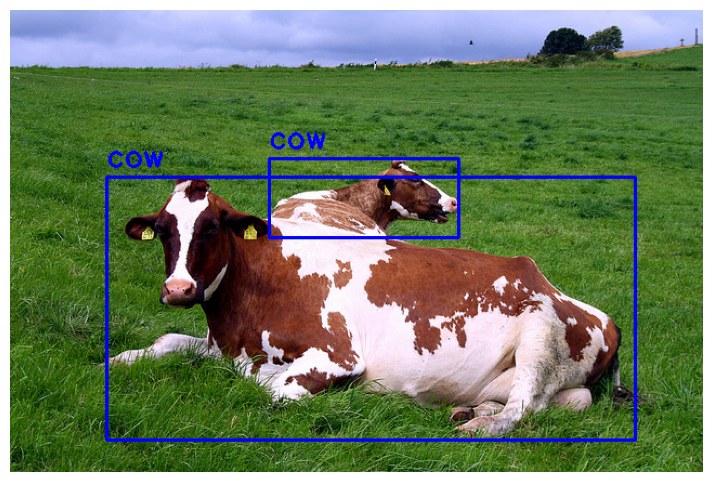

In [12]:
model = YOLO('yolov8n.pt')


img3=cv2.imread('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000019.jpg')
img3_rgb= cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

results=model('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000019.jpg')


for r in results: 
    for obj in r.boxes:
        cls=int(obj.cls[0])
        label=r.names[cls]
        if label in ['cow']:
            x1,y1,x2,y2 = map(int, obj.xyxy[0])
            color= (0,0,255) if label == 'cow' else (255,0,0)
            cv2.rectangle(img3_rgb, (x1,y1), (x2,y2), color, 2)
            cv2.putText(img3_rgb, label, (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

plt.figure(figsize=(10,6))
plt.imshow(img3_rgb)
plt.axis("off")
plt.show()


image 1/1 /kaggle/input/coco-2017-dataset/coco2017/test2017/000000000019.jpg: 448x640 2 cows, 178.0ms
Speed: 1.5ms preprocess, 178.0ms inference, 6.3ms postprocess per image at shape (1, 3, 448, 640)


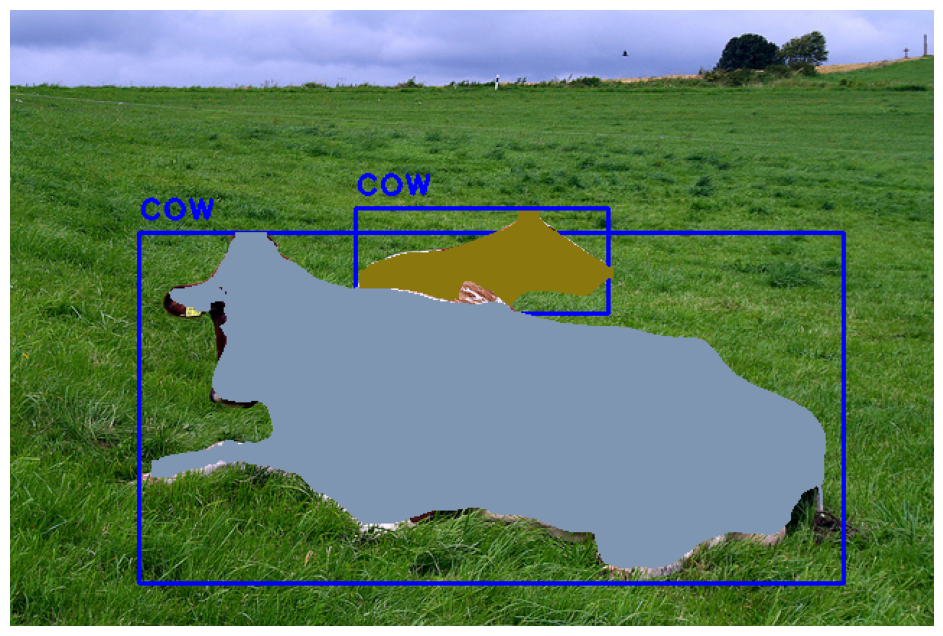

In [13]:
# segmentation

model = YOLO("yolov8n-seg.pt") 

results = model('/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000019.jpg')


for r in results:
    if r.masks is not None:
        for obj in r.masks:
            mask = obj.data[0].cpu().numpy()
            
            # Resize mask to match image dimensions
            mask_resized = cv2.resize(mask, (img3_rgb.shape[1], img3_rgb.shape[0]))
            mask_resized = mask_resized > 0.5  # binarize
            
            
            color = np.random.randint(0, 255, size=(3,), dtype=int)
            img3_rgb[mask_resized] = color


plt.figure(figsize=(12,8))
plt.imshow(img3_rgb)
plt.axis("off")
plt.show()

In [14]:
""" 
{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
  62: 'tv',
  63: 'laptop',
  64: 'mouse',
  65: 'remote',
  66: 'keyboard',
  67: 'cell phone',
  68: 'microwave',
  69: 'oven',
  70: 'toaster',
  71: 'sink',
  72: 'refrigerator',
  73: 'book',
  74: 'clock',
  75: 'vase',
  76: 'scissors',
  77: 'teddy bear',
  78: 'hair drier',
  79: 'toothbrush'}
  
  """

" \n{0: 'person',\n 1: 'bicycle',\n 2: 'car',\n 3: 'motorcycle',\n 4: 'airplane',\n 5: 'bus',\n 6: 'train',\n 7: 'truck',\n 8: 'boat',\n 9: 'traffic light',\n 10: 'fire hydrant',\n 11: 'stop sign',\n 12: 'parking meter',\n 13: 'bench',\n 14: 'bird',\n 15: 'cat',\n 16: 'dog',\n 17: 'horse',\n 18: 'sheep',\n 19: 'cow',\n 20: 'elephant',\n 21: 'bear',\n 22: 'zebra',\n 23: 'giraffe',\n 24: 'backpack',\n 25: 'umbrella',\n 26: 'handbag',\n 27: 'tie',\n 28: 'suitcase',\n 29: 'frisbee',\n 30: 'skis',\n 31: 'snowboard',\n 32: 'sports ball',\n 33: 'kite',\n 34: 'baseball bat',\n 35: 'baseball glove',\n 36: 'skateboard',\n 37: 'surfboard',\n 38: 'tennis racket',\n 39: 'bottle',\n 40: 'wine glass',\n 41: 'cup',\n 42: 'fork',\n 43: 'knife',\n 44: 'spoon',\n 45: 'bowl',\n 46: 'banana',\n 47: 'apple',\n 48: 'sandwich',\n 49: 'orange',\n 50: 'broccoli',\n 51: 'carrot',\n 52: 'hot dog',\n 53: 'pizza',\n 54: 'donut',\n 55: 'cake',\n 56: 'chair',\n 57: 'couch',\n 58: 'potted plant',\n 59: 'bed',\n 60: 'd